In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [53]:
from keras.datasets import fashion_mnist

# **Loading and preprocessing the dataset**

In [54]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_val, y_train, y_val = train_test_split( x_train, y_train, test_size=0.2)

**Reshaping the data set**

In [55]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
x_val = x_val.reshape((x_val.shape[0], 28, 28, 1))

**Normalizing the dataset**

In [56]:
# coverting data as float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_val = x_val.astype('float32')
# converting data between 0 and 1
x_train /= 255
x_test /= 255
x_val /= 255

**One hot encoding on labels**

In [59]:
#Making copy of labels so that it can be used in confusion matrix,as normal labels will be required there not one hot encoding of labels

test_labels = y_test
train_labels = y_train
val_labels = y_val

In [58]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
y_val = np_utils.to_categorical(y_val)

# CNN Model

In [60]:
dropouts =[0.1,0.2]
kernel_sizes =[3,5]
pool_scales= [2,3]
dense_units=[64,128]
batch_sizes=[64,128]
conv2d_filters = [32,64]

In [61]:
epochs=12

In [62]:
def create_model(dropout,kernel_size,pool_scale,dense_unit,conv2d_filter):

  model = Sequential()
  model.add(Conv2D(conv2d_filter, (kernel_size, kernel_size), activation='relu', input_shape=(28, 28, 1)))
  model.add(Conv2D(conv2d_filter*2, (kernel_size, kernel_size), activation='relu'))
  model.add(MaxPooling2D((pool_scale, pool_scale)))
  model.add(Dropout(dropout))
  model.add(Flatten())
  model.add(Dense(dense_unit, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dropout(dropout))
  model.add(Dense(10, activation='softmax'))
  model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer=keras.optimizers.Adam(),
                metrics=['accuracy'])
  return model

In [ ]:
for dropout in dropouts:
  for kernel_size in kernel_sizes:
    for pool_scale in pool_scales:
      for dense_unit in dense_units:
        for conv2d_filter in conv2d_filters:
          for batch_size in batch_sizes:

            model = create_model(dropout,kernel_size,pool_scale,dense_unit,conv2d_filter)
            history = model.fit(x_train, y_train, 
                     epochs = epochs, 
                     batch_size =batch_size,
                     verbose = 1,
                     validation_data = (x_val, y_val)
                     )

**Final Model**

By doing hyperparameter tuning, it has been found that model is performing best on following hyperparmeters.

dropouts =0.1 

kernel_sizes =3

pool_scales= 2

dense_units=128

batch_sizes=64

conv2d_filters =64

In [31]:
final_model = create_model(0.1,3,2,128,64)

In [33]:
history = final_model.fit(x_train, y_train, 
                     epochs = epochs, 
                     batch_size = 64,
                     verbose = 1,
                     validation_data = (x_val, y_val)
                     )

Epoch 1/12
750/750 [==============================] - 7s 9ms/step - loss: 0.5748 - accuracy: 0.7928 - val_loss: 0.2773 - val_accuracy: 0.8998
Epoch 2/12
750/750 [==============================] - 6s 8ms/step - loss: 0.2622 - accuracy: 0.9044 - val_loss: 0.2220 - val_accuracy: 0.9200
Epoch 3/12
750/750 [==============================] - 6s 8ms/step - loss: 0.1980 - accuracy: 0.9283 - val_loss: 0.2059 - val_accuracy: 0.9227
Epoch 4/12
750/750 [==============================] - 6s 8ms/step - loss: 0.1554 - accuracy: 0.9412 - val_loss: 0.2046 - val_accuracy: 0.9262
Epoch 5/12
750/750 [==============================] - 6s 8ms/step - loss: 0.1230 - accuracy: 0.9547 - val_loss: 0.2026 - val_accuracy: 0.9318
Epoch 6/12
750/750 [==============================] - 6s 8ms/step - loss: 0.0889 - accuracy: 0.9675 - val_loss: 0.2361 - val_accuracy: 0.9279
Epoch 7/12
750/750 [==============================] - 6s 8ms/step - loss: 0.0663 - accuracy: 0.9758 - val_loss: 0.2653 - val_accuracy: 0.9210
Epoch 

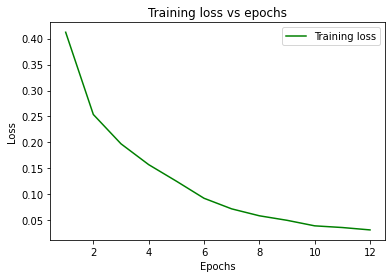

In [35]:
training_loss = history.history['loss']
epochs = range(1,13)
plt.plot(epochs, training_loss, 'g', label='Training loss')
plt.title('Training loss vs epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

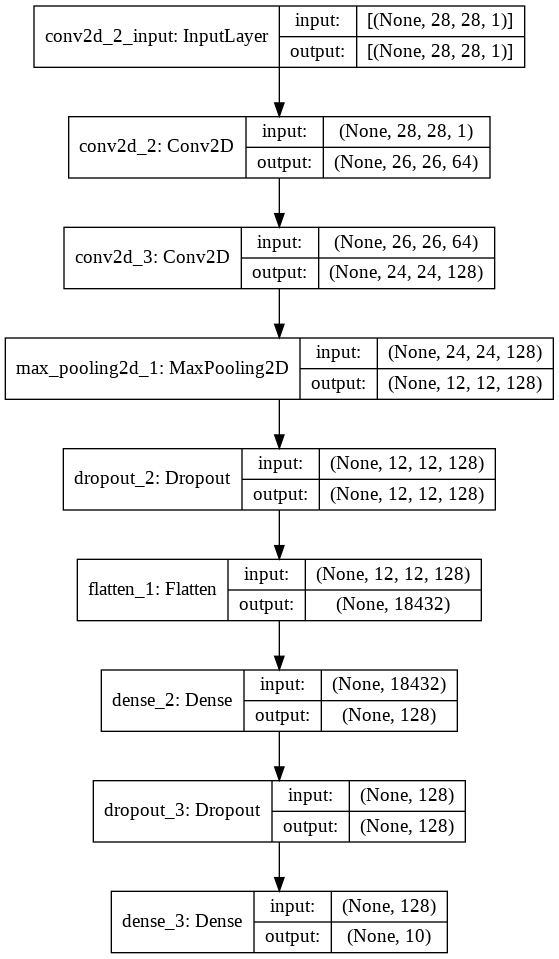

In [36]:
from keras.utils.vis_utils import plot_model
plot_model(final_model, to_file='model.png', show_shapes=True, show_layer_names=True)

# Saving the model

In [37]:
final_model.save('model.h5')

# Evaluating model on test data

In [38]:
from keras.models import load_model

model = load_model('model.h5')
_, accuracy = model.evaluate(x_test, y_test, verbose=1)

print('Accuracy', accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.3950 - accuracy: 0.9203
Accuracy 0.9203000068664551


# **Generating classes for images and saving them in file**

In [39]:
prediction = model.predict(x_test)
y_predicted = np.argmax(prediction, axis =1)

In [40]:
y_predicted

array([9, 2, 1, ..., 8, 1, 5])

In [41]:
import pandas as pd
df = pd.DataFrame (y_predicted,columns=['Predicted_labels'])

In [42]:
df.to_csv('cnn.txt', header=True, index=True)

In [43]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

# Confusion matrix

In [ ]:
# I have referred following link for the confusion matrix
#  http://athena.ecs.csus.edu/~hoangkh/Image%20Classification%20with%20Fashion-MNIST%20and%20CIFAR-10.html

In [49]:
import itertools

In [50]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

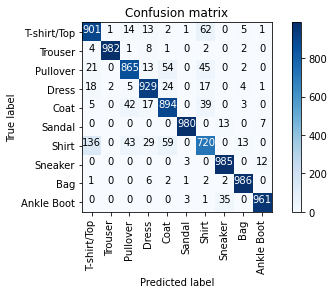

In [51]:
confusion_mtx = confusion_matrix(test_labels, y_predicted) 

plot_confusion_matrix(confusion_mtx, 
            classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot'])